In [13]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LogisticRegression()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.128)


Ideal: 0.890
> folds=2, accuracy=0.890 (0.880,0.900)
> folds=3, accuracy=0.890 (0.879,0.912)
> folds=4, accuracy=0.910 (0.800,1.000)
> folds=5, accuracy=0.900 (0.850,1.000)
> folds=6, accuracy=0.900 (0.875,0.941)
> folds=7, accuracy=0.899 (0.714,1.000)
> folds=8, accuracy=0.900 (0.769,1.000)
> folds=9, accuracy=0.909 (0.818,1.000)
> folds=10, accuracy=0.880 (0.700,1.000)
> folds=11, accuracy=0.879 (0.667,1.000)
> folds=12, accuracy=0.891 (0.667,1.000)
> folds=13, accuracy=0.891 (0.750,1.000)
> folds=14, accuracy=0.879 (0.571,1.000)
> folds=15, accuracy=0.881 (0.714,1.000)
> folds=16, accuracy=0.879 (0.667,1.000)
> folds=17, accuracy=0.892 (0.500,1.000)
> folds=18, accuracy=0.891 (0.500,1.000)
> folds=19, accuracy=0.888 (0.600,1.000)
> folds=20, accuracy=0.880 (0.600,1.000)
> folds=21, accuracy=0.881 (0.600,1.000)
> folds=22, accuracy=0.893 (0.600,1.000)
> folds=23, accuracy=0.893 (0.600,1.000)
> folds=24, accuracy=0.888 (0.500,1.000)
> folds=25, accuracy=0.890 (0.500,1.000)
> folds=26,

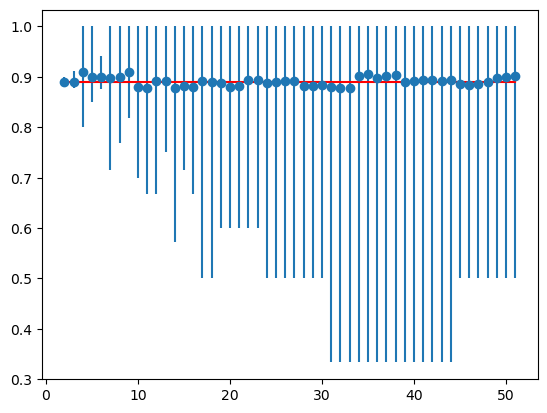

In [22]:

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 

def get_dataset(n_samples=100):
 X, y = make_classification(n_samples=n_samples, n_features=7, n_informative=5, n_redundant=2, random_state=1)
 return X, y
 

def get_model():
    model = LogisticRegression()
    return model
 

def evaluate_model(cv):

    X, y = get_dataset()
 
    model = get_model()
 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 
    return mean(scores), scores.min(), scores.max()
 

ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

folds = range(2,52)

means, mins, maxs = list(),list(),list()

for k in folds:
 
 cv = KFold(n_splits=k, shuffle=True, random_state=1)
 
 k_mean, k_min, k_max = evaluate_model(cv)
 
 print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
 
 means.append(k_mean)
 
 mins.append(k_mean - k_min)
 maxs.append(k_max - k_mean)

pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')

pyplot.show()